<pre><b>Author</b>: Ashlynn Wimer
<b>Date</b>: 3/4/2024
</pre>

This notebook is used for summary exploration of the scraped 4chan posts en masse.

In [2]:
from datetime import datetime, timedelta
from matplotlib.patches import Patch
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import HelperChan
import pandas as pd
import numpy as np
import scipy.stats as scistats

In [3]:
BACKGROUND_COLOR = '#f0eadf'
SPINE_COLOR = '#a39070'
FONT_COLOR = '#372214'

bar_colors = {
    0:'#5BCEFA',
    1:'#F5A9B8'
}

legend_entry = {
    0:'Not Trans Related',
    1:'Trans Related'
}

We start by getting the number of posts posted per day. We want two versions of this graph:

1. The reasonable "this is what a week's worth of posting traffic on 4chan probably looks like" graph. This graph will be based on my week 3 data, as that data is the most complete.

2. The "this is what the date distribution of my samples looks like" graph. This graph will be based on _all_ of my data. 

I also want to get a sense of when in the day posts are made, for which I'll use the week 3 data and make an hourly graph.

In [4]:
# Our method below returns numbers instead of names; this dict converts them.
daynum_to_dayname = {
    0: 'Monday',    1: 'Tuesday',  2: 'Wednesday', 3: 'Thursday',
    4: 'Friday',    5: 'Saturday', 6: 'Sunday'
}

all_posts = pd.read_csv('../data/fully_labeled_data.csv')

all_posts['datetime'] = HelperChan.make_datetime(all_posts)
all_posts['date'] = all_posts['date'].apply(HelperChan.standardize_date)

all_dates = all_posts[['date', 'transRelated']]\
            .value_counts()\
            .sort_index()\
            .reset_index()

all_weekdays = all_posts[['date', 'transRelated']]

all_weekdays['date'] = all_weekdays['date']\
                .apply(datetime.fromisoformat)\
                .apply(datetime.weekday)\

all_weekdays = all_weekdays\
                .value_counts()\
                .sort_index()\
                .reset_index()

all_weekdays['dayname'] = all_weekdays['date']\
                            .apply(lambda x: daynum_to_dayname[x])

week3 = pd.read_csv('../data/lgbt_week_3.csv')\
    .merge(all_posts[['id', 'transRelated']], on='id')

week3['datetime'] = HelperChan.make_datetime(week3)
week3['date'] = week3['date'].apply(HelperChan.standardize_date)

# This isn't apparent at a glance, but this manipulation gets the 7 dates
# on which the 4chanscrape ran perfectly!
valid_dates = week3['date']\
    .value_counts()[:7]\
        .reset_index()['date']

week3_straight = week3[week3['date'].isin(valid_dates)]
week3_straight['dayOfWeek'] = week3_straight['datetime']\
    .apply(lambda x: datetime.weekday(datetime.fromisoformat(x)))

week3_straight = week3_straight[['dayOfWeek', 'transRelated']].value_counts().sort_index().reset_index()


C:\Users\wimer\AppData\Local\Temp\ipykernel_9328\2433393969.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_weekdays['date'] = all_weekdays['date']\
C:\Users\wimer\AppData\Local\Temp\ipykernel_9328\2433393969.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week3_straight['dayOfWeek'] = week3_straight['datetime']\


Let's grab start and end dates for visuals:

In [182]:
start_ends = {'week_1':(), 'week_2':(), 'week_3':()}

for week in start_ends.keys():
    dates = pd.read_csv(f'../data/lgbt_{week}.csv')['date']\
        .apply(HelperChan.standardize_date)\
        .sort_values()\
        .reset_index(drop=True)
    start_ends[week] = (dates[0], dates[len(dates)-1])

start_ends

{'week_1': ('2024-01-30', '2024-02-11'),
 'week_2': ('2024-02-02', '2024-02-16'),
 'week_3': ('2024-02-14', '2024-02-27')}

That.. that is interesting but annoying. I'm mostly confused about how week 2 is showing as such a short sample period; my best guess is that the 02-16 date is when the scraper broke that week, and the 02-14 date from week 3 is the result of threads "being alive" around then. This seems to be supported by the plot itself as well, which is good. 

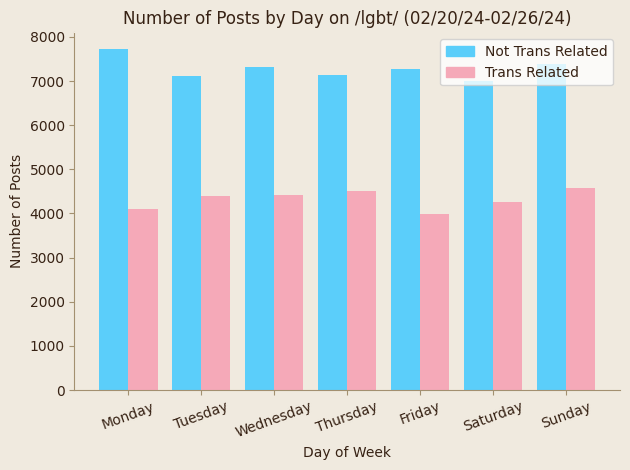

In [119]:
plt.rcParams.update({'text.color':FONT_COLOR,
             'axes.labelcolor':FONT_COLOR,
             'axes.labelcolor':FONT_COLOR,
             'xtick.color':FONT_COLOR,
             'ytick.color':FONT_COLOR})

fig, ax = plt.subplots()

ax.bar(x=week3_straight['dayOfWeek'].unique(), width=-0.4, align='edge',
       height=week3_straight['count'][week3_straight['transRelated'] == 0],
       color=bar_colors[0])

ax.bar(x=week3_straight['dayOfWeek'].unique(), width=0.4, align='edge',
       height=week3_straight['count'][week3_straight['transRelated'] == 1],
       color=bar_colors[1])

ax.set_xticks(ticks=[0, 1, 2, 3, 4, 5, 6], 
              labels=['Monday', 'Tuesday', 'Wednesday', 
                        'Thursday', 'Friday', 'Saturday', 'Sunday'],
                rotation=20)

ax.set_xlabel('Day of Week')
ax.set_ylabel('Number of Posts')

ax.set_title('Number of Posts by Day on /lgbt/ (02/20/24-02/26/24)')

ax.legend(handles=\
          [Patch(color=bar_colors[i], label=legend_entry[i]) 
           for i in range(2)])

fig.tight_layout()

ax.set_facecolor(BACKGROUND_COLOR)
fig.set_facecolor(BACKGROUND_COLOR)

ax.spines['bottom'].set_color(SPINE_COLOR)
ax.spines['left'].set_color(SPINE_COLOR)

ax.spines['top'].set_color(BACKGROUND_COLOR)
ax.spines['right'].set_color(BACKGROUND_COLOR)
ax.tick_params(axis='both', color=SPINE_COLOR)


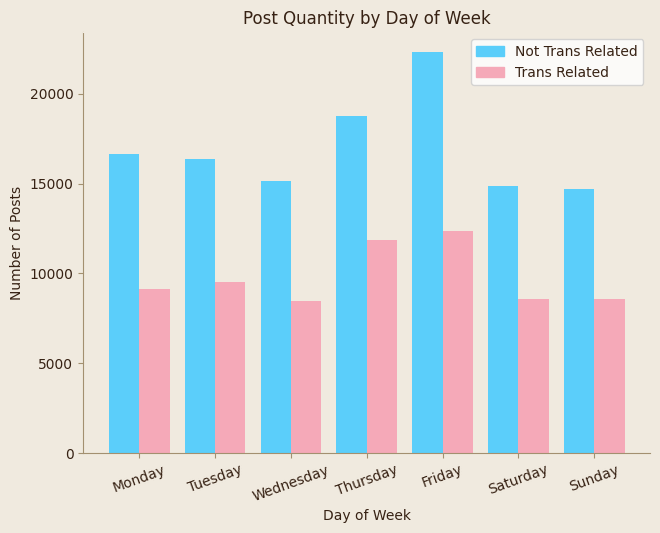

In [120]:
plt.rcParams.update({'text.color':FONT_COLOR,
             'axes.labelcolor':FONT_COLOR,
             'axes.labelcolor':FONT_COLOR,
             'xtick.color':FONT_COLOR,
             'ytick.color':FONT_COLOR})

fig, ax = plt.subplots()

ax.legend(handles=\
          [Patch(color=bar_colors[i], label=legend_entry[i]) 
           for i in range(2)])

fig.tight_layout()

ax.set_facecolor(BACKGROUND_COLOR)
fig.set_facecolor(BACKGROUND_COLOR)

ax.spines['bottom'].set_color(SPINE_COLOR)
ax.spines['left'].set_color(SPINE_COLOR)

ax.spines['top'].set_color(BACKGROUND_COLOR)
ax.spines['right'].set_color(BACKGROUND_COLOR)
ax.tick_params(axis='both', color=SPINE_COLOR)

ax.bar(x=all_weekdays['dayname'].unique(), width=-0.4, align='edge',
       height=all_weekdays['count'][all_weekdays['transRelated'] == 0],
       color=bar_colors[0])

ax.bar(x=all_weekdays['dayname'].unique(), width=0.4, align='edge',
       height=all_weekdays['count'][all_weekdays['transRelated'] == 1],
       color=bar_colors[1])

ax.set_title('Post Quantity by Day of Week')
ax.set_ylabel('Number of Posts')
ax.set_xlabel('Day of Week')

ax.set_xticks(ticks=all_weekdays['dayname'].unique(), labels=all_weekdays['dayname'].unique(), rotation=20)

In [7]:
all_dates['date'].unique()[-1]

'2024-02-27'

Text(0.5, 23.52222222222222, 'Date')

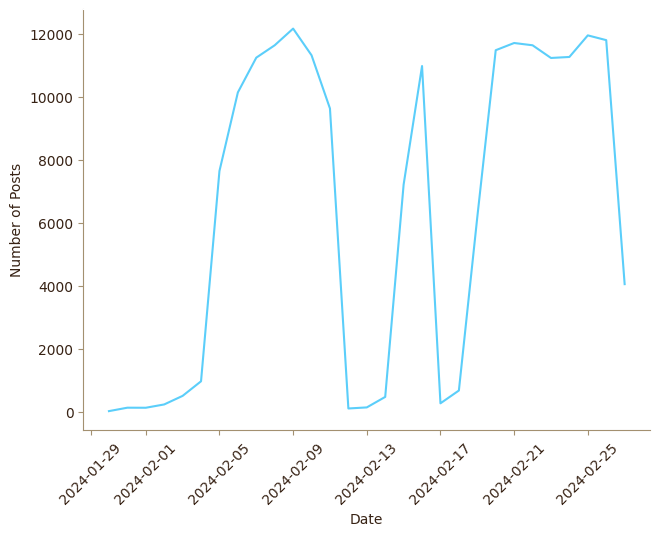

In [16]:
plt.rcParams.update({'text.color':FONT_COLOR,
             'axes.labelcolor':FONT_COLOR,
             'axes.labelcolor':FONT_COLOR,
             'xtick.color':FONT_COLOR,
             'ytick.color':FONT_COLOR})

fig, ax = plt.subplots()

fig.tight_layout()
# BACKGROUND_COLOR = '#ffffff' # if putting image in paper
ax.set_facecolor(BACKGROUND_COLOR)
fig.set_facecolor(BACKGROUND_COLOR)

ax.spines['bottom'].set_color(SPINE_COLOR)
ax.spines['left'].set_color(SPINE_COLOR)

ax.spines['top'].set_color(BACKGROUND_COLOR)
ax.spines['right'].set_color(BACKGROUND_COLOR)
ax.tick_params(axis='both', color=SPINE_COLOR)

days = [datetime.strptime(d, '%Y-%m-%d').date() for d in all_dates['date'].unique()]

post_counts = all_dates['count'][all_dates['transRelated'] == 0].reset_index(drop=True) + all_dates['count'][all_dates['transRelated'] == 1].reset_index(drop=True)
ax.plot(#all_dates['date'][all_dates['transRelated'] == 0], 
        days, # we have duplicate copies of dates in the Df
        post_counts,
        color=bar_colors[0])

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.tick_params(axis='x', labelrotation=45)

ax.set_ylabel('Number of Posts')
ax.set_xlabel('Date')
#ax.set_title('Number of /lgbt/ Posts in Sample by Time')

Text(0.5, 1.0, 'Number of /lgbt/ Posts in Sample by Time')

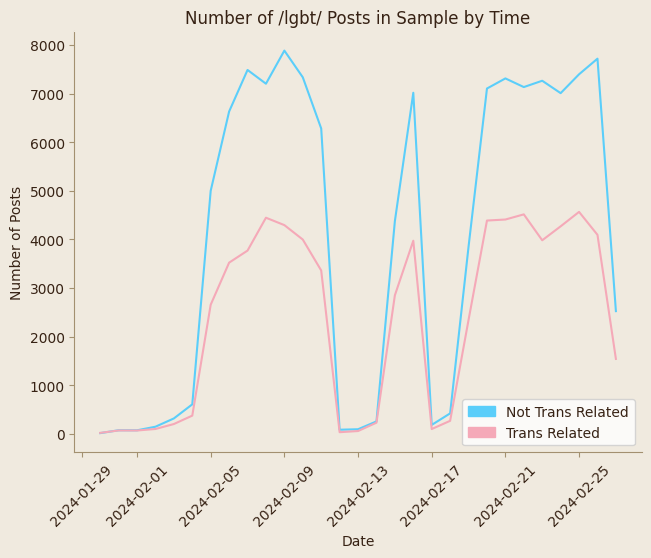

In [169]:
plt.rcParams.update({'text.color':FONT_COLOR,
             'axes.labelcolor':FONT_COLOR,
             'axes.labelcolor':FONT_COLOR,
             'xtick.color':FONT_COLOR,
             'ytick.color':FONT_COLOR})

fig, ax = plt.subplots()

ax.legend(handles=\
          [Patch(color=bar_colors[i], label=legend_entry[i]) 
           for i in range(2)])

fig.tight_layout()

ax.set_facecolor(BACKGROUND_COLOR)
fig.set_facecolor(BACKGROUND_COLOR)

ax.spines['bottom'].set_color(SPINE_COLOR)
ax.spines['left'].set_color(SPINE_COLOR)

ax.spines['top'].set_color(BACKGROUND_COLOR)
ax.spines['right'].set_color(BACKGROUND_COLOR)
ax.tick_params(axis='both', color=SPINE_COLOR)

days = [datetime.strptime(d, '%Y-%m-%d').date() for d in all_dates['date'].unique()]

ax.plot(#all_dates['date'][all_dates['transRelated'] == 0], 
        days,
        all_dates['count'][all_dates['transRelated'] == 0],
        color=bar_colors[0])

ax.plot(#all_dates['date'][all_dates['transRelated'] == 1], 
        days,
        all_dates['count'][all_dates['transRelated'] == 1],
        color=bar_colors[1])


ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.tick_params(axis='x', labelrotation=45)

ax.set_ylabel('Number of Posts')
ax.set_xlabel('Date')
ax.set_title('Number of /lgbt/ Posts in Sample by Time')

We're also curious about how many mosts have authorship or not, and the breakdown of post by whether it was written by a user with a tripcode or not. We check that below:

In [193]:
len(all_posts[all_posts['author'] == 'Anonymous']), len(all_posts[all_posts['author'] != 'Anonymous'])

(159325, 28050)

In [200]:
by_anonymous = all_posts['author'] == 'Anonymous'

transportionanon = (sum(all_posts[by_anonymous]['transRelated']))
transportionnotanon = (sum(all_posts[~by_anonymous]['transRelated']))
nottransportionanon = len(all_posts[by_anonymous]) - transportionanon
nottransportionnotanon = len(all_posts[~by_anonymous]) - transportionnotanon


Okay, that's interesting. Let's run a chi-square test and then make some visuals:

In [222]:
f_obs = [[transportionanon, transportionnotanon],
        [nottransportionanon, nottransportionnotanon]]

percent_trans_post_global = sum(all_posts['transRelated']) / len(all_posts)

f_exp = [[len(all_posts[by_anonymous]) * percent_trans_post_global, len(all_posts[~by_anonymous]) * percent_trans_post_global],
         [len(all_posts[by_anonymous]) * (1-percent_trans_post_global), len(all_posts[~by_anonymous]) * (1-percent_trans_post_global)]]

scistats.chisquare(f_obs, np.round(f_exp, 0))

Power_divergenceResult(statistic=array([ 371.17245962, 2108.30577753]), pvalue=array([1.03971517e-82, 0.00000000e+00]))

Okay, these all break _heavily_ from the expected distribution. One could attempt to explaing this finding away as caused by sampling bias poorly sampled data, but -- unless we have reason to believe that posts made by users with tripcodes stick around for less time -- that bias should be uniformly applied. 

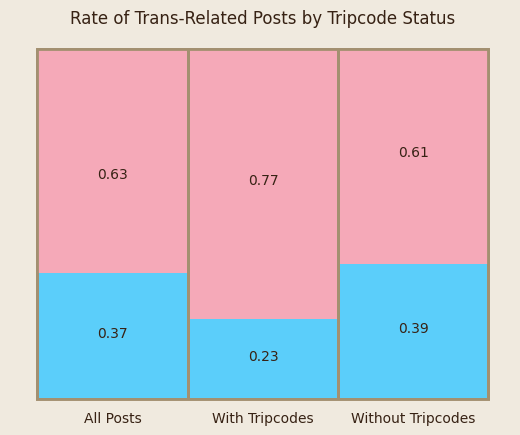

In [317]:

trans_tripcode_rate = transportionnotanon / len(all_posts[~by_anonymous])
trans_anonymous_rate = transportionanon / len(all_posts[by_anonymous])

categories = (
    'All Posts',
    'With Tripcodes',
    'Without Tripcodes'
)

rates = {
    'Trans Posts': np.array([percent_trans_post_global, trans_tripcode_rate, trans_anonymous_rate]),
    'Non Trans Posts': np.array([(1 - percent_trans_post_global), (1-trans_tripcode_rate), (1-trans_anonymous_rate)])
}

bar_colors = {
    'Trans Posts':'#5BCEFA',
    'Non Trans Posts':'#F5A9B8'
}


plt.rcParams.update({'text.color':FONT_COLOR,
             'axes.labelcolor':FONT_COLOR,
             'axes.labelcolor':FONT_COLOR,
             'xtick.color':FONT_COLOR,
             'ytick.color':FONT_COLOR})

fig, ax = plt.subplots()
bottom = np.zeros(3)

ax.set_facecolor(BACKGROUND_COLOR)
fig.set_facecolor(BACKGROUND_COLOR)

ax.spines['bottom'].set_color(BACKGROUND_COLOR)
ax.spines['left'].set_color(BACKGROUND_COLOR)
ax.tick_params(axis='y', color=BACKGROUND_COLOR, labelleft=False)


ax.spines['top'].set_color(BACKGROUND_COLOR)
ax.spines['right'].set_color(BACKGROUND_COLOR)
ax.tick_params(axis='x', color=BACKGROUND_COLOR)


width = 1
for boolean, rate in rates.items():
    p = ax.bar(categories, rate, width, label=boolean, 
        bottom=bottom, color=bar_colors[boolean])
    ax.bar(categories, [1, 1, 1], width, bottom=0, color=(0, 0, 0, 0),
               edgecolor=SPINE_COLOR, linewidth=2)
    ax.bar(categories, [0.0001, 0.0001, 0.0001], width, bottom=0, color=(0, 0, 0, 0),
               edgecolor=SPINE_COLOR, linewidth=5)
    

    bottom += rate

x_pos = -.1
ax.annotate(round(percent_trans_post_global,2), 
            (x_pos, percent_trans_post_global*.5))
ax.annotate(round(1 - percent_trans_post_global,2), 
            (x_pos, 1 - percent_trans_post_global))

x_pos = .9
ax.annotate(round(trans_tripcode_rate,2), 
            (x_pos, trans_tripcode_rate*.5))
ax.annotate(round(1 - trans_tripcode_rate,2), 
            (x_pos, 1 - (1 - trans_tripcode_rate) * .5))

x_pos = 1.9
ax.annotate(round(trans_anonymous_rate,2), 
            (x_pos, trans_anonymous_rate*.5))
ax.annotate(round(1 - trans_anonymous_rate,2), 
            (x_pos, 1 - (1 - trans_anonymous_rate) * .5))


ax.set_title('Rate of Trans-Related Posts by Tripcode Status')

#fig.tight_layout()

plt.show()

As one last statistic I need for the paper:

In [19]:
sum (all_posts['author'] != 'Anonymous') / len(all_posts)

0.14969979986657772